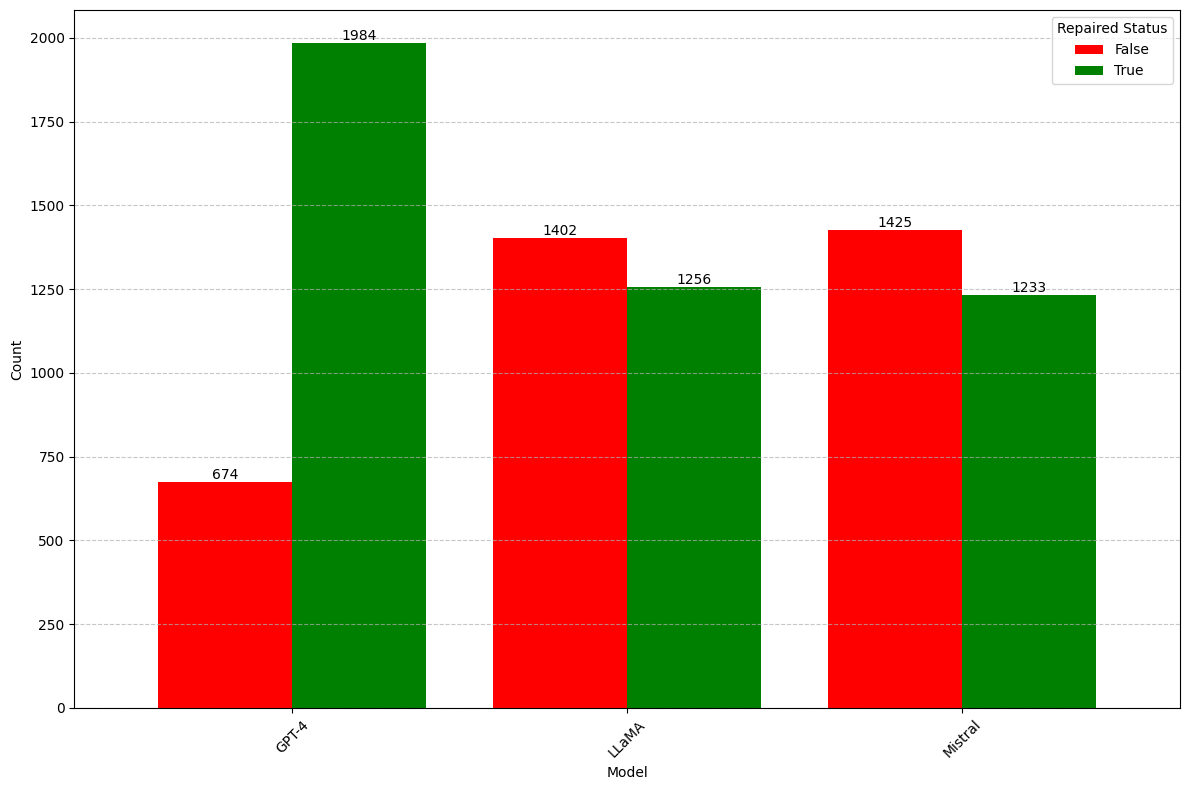

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar as tabelas
#claude_table_df = pd.read_csv("dataset/DafnyBench/hints_removed/Tables/repair_claude_table.csv")
gpt4_table_df = pd.read_csv(r"dataset\DafnyBench\ground_truth\Tables\repair_gpt_table.csv")
llama_table_df = pd.read_csv(r"dataset\DafnyBench\ground_truth\Tables\repair_llama_table.csv")
#llemma_table_df = pd.read_csv("C:/Users/filip/Downloads/Valentina_1/Thesis_Project/dataset/DafnyBench/hints_removed/Tables/repair_llemma_table.csv")
mistral_table_df = pd.read_csv(r"dataset\DafnyBench\ground_truth\Tables\repair_mistral_table.csv")

# Contar a quantidade de True e False na coluna 'Repaired' para cada tabela
#contagem_claude = claude_table_df['Repaired'].value_counts()
contagem_gpt4 = gpt4_table_df['Repaired'].value_counts()
contagem_llama = llama_table_df['Repaired'].value_counts()
#contagem_llemma = llemma_table_df['Repaired'].value_counts()
contagem_mistral = mistral_table_df['Repaired'].value_counts()

# Criar um DataFrame com todos os resultados
resultados = pd.DataFrame({
    #'Claude': contagem_claude,
    'GPT-4': contagem_gpt4,
    'LLaMA': contagem_llama,
    #'LLeMA': contagem_llemma,
    'Mistral': contagem_mistral
}).fillna(0)

# Transpor o DataFrame para criar grupos de barras
resultados = resultados.T

# Criar o gráfico de barras agrupadas
colors = ['red', 'green']  # Cores para False e True, respectivamente
ax = resultados.plot(kind='bar', figsize=(12, 8), color=colors, width=0.8)

# Adicionar números sobre as barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Para não adicionar rótulos em barras de altura zero
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, int(height), ha='center', va='bottom')

#plt.title('Count of Repaired by Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['False', 'True'], title='Repaired Status', loc='upper right')
plt.tight_layout()
plt.show()


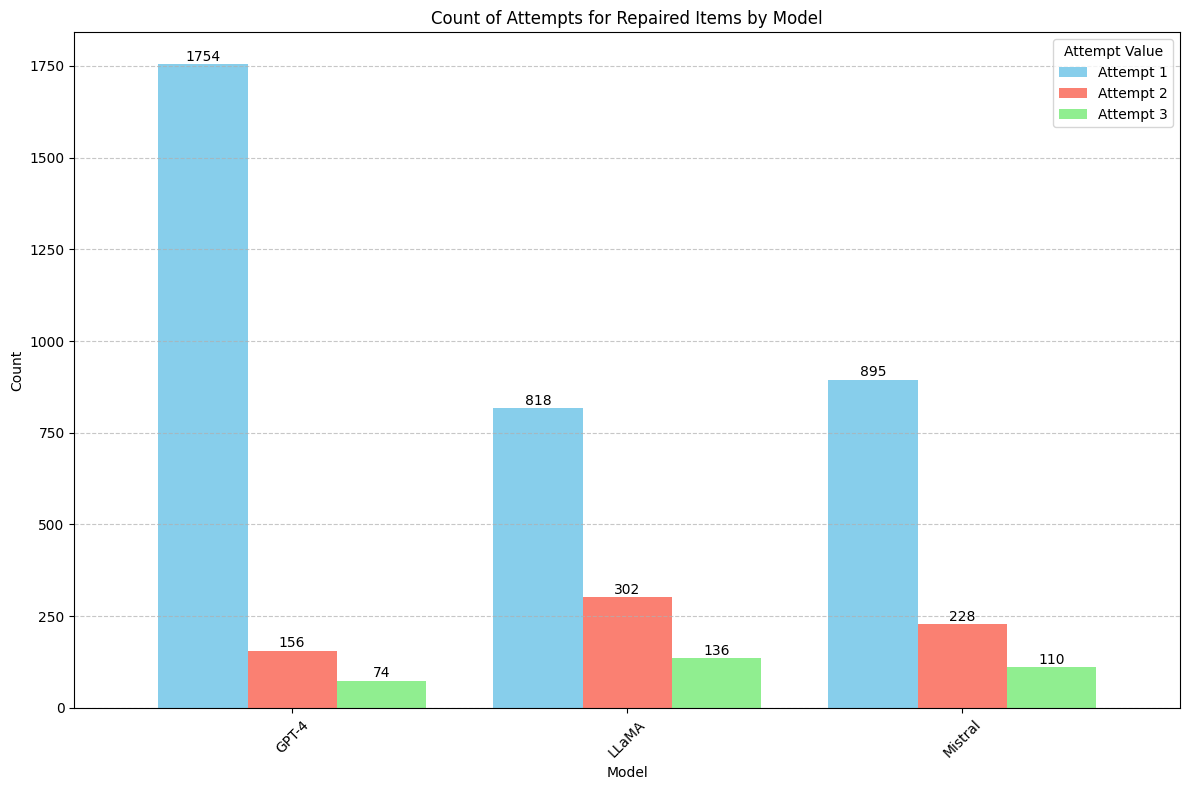

In [2]:
# Função para processar o DataFrame
def process_attempts(df):
    # Filtrar para apenas 'Repaired' == True
    filtered_df = df[df['Repaired'] == True]
    # Contar a quantidade de cada valor em 'Attempt'
    attempt_counts = filtered_df['Attempt'].value_counts()
    # Mapear valores de Attempt para rótulos desejados: 0 -> 1, 1 -> 2, 2 -> 3
    attempt_counts.index = attempt_counts.index.map({0: 1, 1: 2, 2: 3})
    return attempt_counts

# Processar cada tabela
#attempt_counts_claude = process_attempts(claude_table_df)
attempt_counts_gpt4 = process_attempts(gpt4_table_df)
attempt_counts_llama = process_attempts(llama_table_df)
#attempt_counts_llemma = process_attempts(llemma_table_df)
attempt_counts_mistral = process_attempts(mistral_table_df)

# Criar um DataFrame com todos os resultados
resultados = pd.DataFrame({
    #'Claude': attempt_counts_claude,
    'GPT-4': attempt_counts_gpt4,
    'LLaMA': attempt_counts_llama,
    #'LLeMA': attempt_counts_llemma,
    'Mistral': attempt_counts_mistral
}).fillna(0)

# Transpor o DataFrame para ter os valores de Attempt no eixo X
resultados = resultados.T

# Criar o gráfico de barras agrupadas
colors = ['skyblue', 'salmon', 'lightgreen']  # Cores para os valores de Attempt
ax = resultados.plot(kind='bar', figsize=(12, 8), color=colors, width=0.8)

# Adicionar números sobre as barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Para não adicionar rótulos em barras de altura zero
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, int(height), ha='center', va='bottom')

plt.title('Count of Attempts for Repaired Items by Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar a legenda para mostrar o valor de Attempt
plt.legend(['Attempt 1', 'Attempt 2', 'Attempt 3'], title='Attempt Value')

plt.tight_layout()
plt.show()

C:\Users\filip\AppData\Local\Temp\ipykernel_1544\617088740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Match'] = filtered_df['Repair_Line'] == filtered_df['Line']
C:\Users\filip\AppData\Local\Temp\ipykernel_1544\617088740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Match'] = filtered_df['Repair_Line'] == filtered_df['Line']
C:\Users\filip\AppData\Local\Temp\ipykernel_1544\617088740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

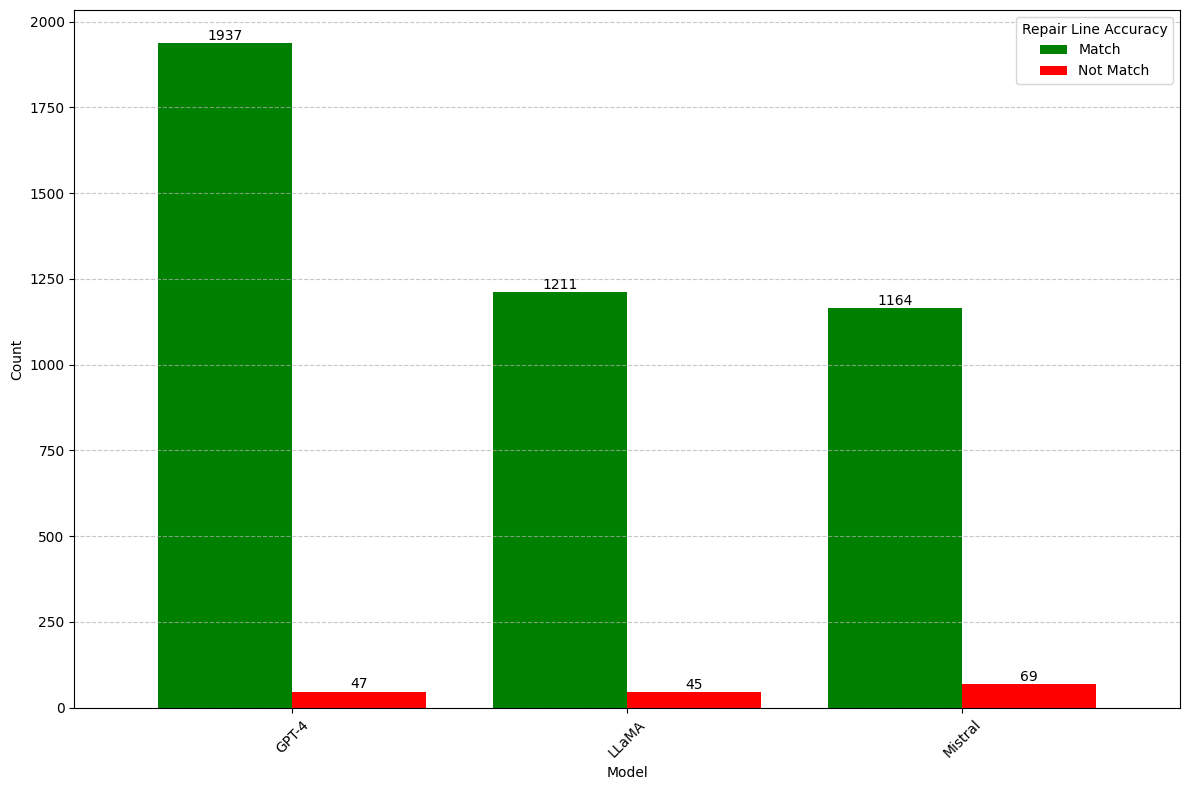

In [6]:
# Função para contar correspondências
def count_matches(df):
    # Filtrar para apenas 'Repaired' == True
    filtered_df = df[df['Repaired'] == True]
    # Verificar se 'Repair_Line' é igual a 'Line'
    filtered_df['Match'] = filtered_df['Repair_Line'] == filtered_df['Line']
    # Contar quantos são iguais e quantos não são iguais
    match_counts = filtered_df['Match'].value_counts()
    return match_counts

# Contar correspondências para cada tabela
#match_counts_claude = count_matches(claude_table_df)
match_counts_gpt4 = count_matches(gpt4_table_df)
match_counts_llama = count_matches(llama_table_df)
#match_counts_llemma = count_matches(llemma_table_df)
match_counts_mistral = count_matches(mistral_table_df)

# Criar um DataFrame com todos os resultados
resultados = pd.DataFrame({
    #'Claude': match_counts_claude,
    'GPT-4': match_counts_gpt4,
    'LLaMA': match_counts_llama,
    #'LLeMA': match_counts_llemma,
    'Mistral': match_counts_mistral
}).fillna(0)

# Transpor o DataFrame para ter os modelos no eixo X
resultados = resultados.T

# Criar o gráfico de barras
colors = ['green', 'red']  # Verde para Match e vermelho para Not Match
ax = resultados.plot(kind='bar', figsize=(12, 8), color=colors, width=0.8)

# Adicionar números sobre as barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Para não adicionar rótulos em barras de altura zero
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, int(height), ha='center', va='bottom')

#plt.title('Count of Matching Repair_Line and Line by Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar a legenda para mostrar correspondência e não correspondência
plt.legend(['Match', 'Not Match'], title='Repair Line Accuracy')

plt.tight_layout()
plt.show()

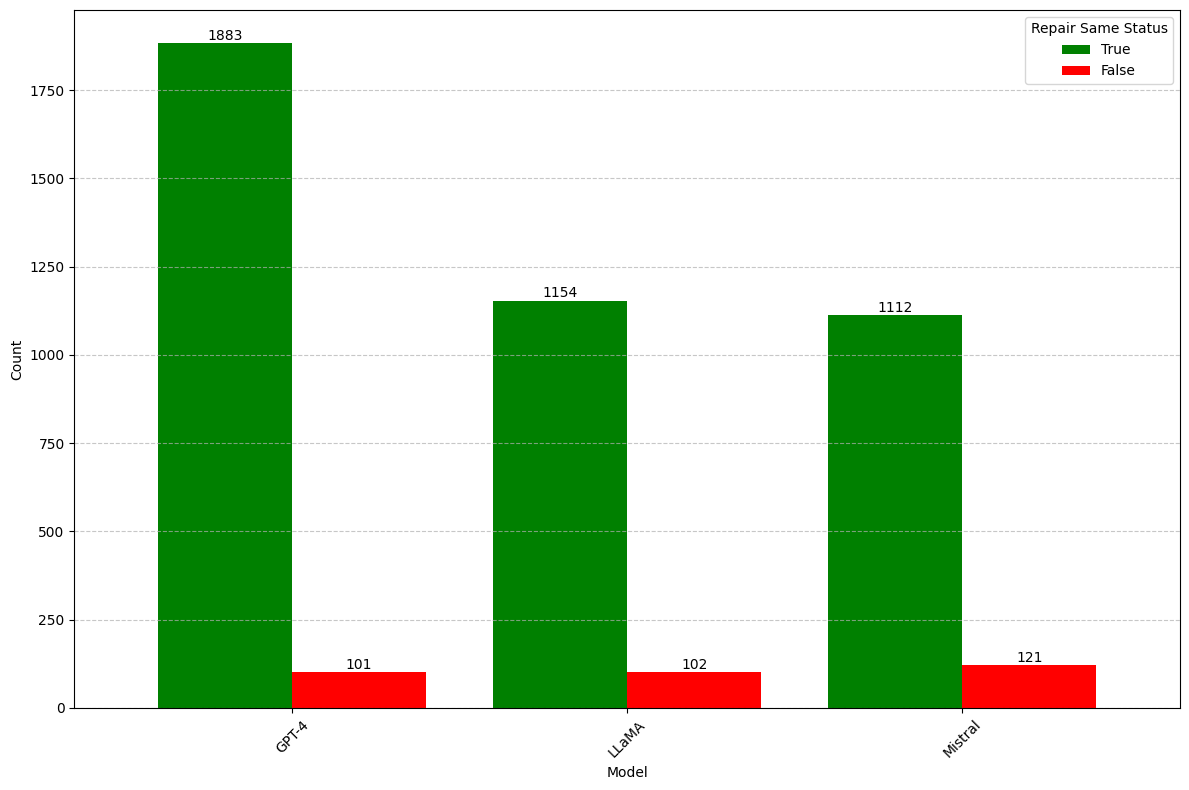

In [11]:
# Função para contar Repair_Same filtrado por Repaired == True
def count_repair_same_filtered(df):
    # Filtrar para apenas 'Repaired' == True
    filtered_df = df[df['Repaired'] == True]
    # Contar a quantidade de True e False na coluna 'Repair_Same'
    repair_same_counts = filtered_df['Repair_Same'].value_counts()
    return repair_same_counts

# Contar Repair_Same para cada tabela
#repair_same_counts_claude = count_repair_same_filtered(claude_table_df)
repair_same_counts_gpt4 = count_repair_same_filtered(gpt4_table_df)
repair_same_counts_llama = count_repair_same_filtered(llama_table_df)
#repair_same_counts_llemma = count_repair_same_filtered(llemma_table_df)
repair_same_counts_mistral = count_repair_same_filtered(mistral_table_df)

# Criar um DataFrame com todos os resultados
resultados = pd.DataFrame({
    #'Claude': repair_same_counts_claude,
    'GPT-4': repair_same_counts_gpt4,
    'LLaMA': repair_same_counts_llama,
    #'LLeMA': repair_same_counts_llemma,
    'Mistral': repair_same_counts_mistral
}).fillna(0)

# Transpor o DataFrame para ter os modelos no eixo X
resultados = resultados.T

# Criar o gráfico de barras
colors = ['green', 'red']  # Vermelho para False e verde para True
ax = resultados.plot(kind='bar', figsize=(12, 8), color=colors, width=0.8)

# Adicionar números sobre as barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Para não adicionar rótulos em barras de altura zero
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, int(height), ha='center', va='bottom')

#plt.title('Count of Repair_Same (Filtered by Repaired) by Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar a legenda para mostrar True e False
plt.legend(['True', 'False'], title='Repair Same Status')

plt.tight_layout()
plt.show()